In [1]:
import pandas as pd
import csv
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

Q1

In [2]:
customers = pd.read_csv("C:/Users/acer/Desktop/ML_pro/Mall_Customers.csv")
customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Q2

In [4]:
customers = customers.drop(columns=['CustomerID'])
customers

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


Q3

In [5]:
max_age = customers['Age'].max()
max_age

70

In [6]:
count_age = customers['Age'].count()
count_age

200

In [7]:
mean_age = customers['Age'].mean()
mean_age

38.85

In [8]:
min_age = customers['Age'].min()
min_age

18

In [9]:
std_age = customers['Age'].std()
std_age

13.969007331558883

In [10]:
firstQ_age = customers['Age'].quantile(0.25)
firstQ_age

28.75

In [11]:
secondQ_age = customers['Age'].quantile(0.50)
secondQ_age

36.0

In [12]:
thirdQ_age = customers['Age'].quantile(0.75)
thirdQ_age

49.0

In [13]:
max_annual = customers['Annual Income (k$)'].max()
max_annual

137

In [14]:
count_annual = customers['Annual Income (k$)'].count()
count_annual

200

In [15]:
mean_annual = customers['Annual Income (k$)'].mean()
mean_annual

60.56

In [16]:
min_annual = customers['Annual Income (k$)'].min()
min_annual

15

In [17]:
std_annual = customers['Annual Income (k$)'].std()
std_annual

26.264721165271254

In [18]:
firstQ_Annual_Income = customers['Annual Income (k$)'].quantile(0.25)
firstQ_Annual_Income

41.5

In [19]:
secondQ_Annual_Income = customers['Annual Income (k$)'].quantile(0.50)
secondQ_Annual_Income

61.5

In [20]:
thirdQ_Annual_Income = customers['Annual Income (k$)'].quantile(0.75)
thirdQ_Annual_Income

78.0

In [21]:
max_spending = customers['Spending Score (1-100)'].max()
max_spending

99

In [22]:
count_spending = customers['Spending Score (1-100)'].count()
count_spending

200

In [23]:
mean_spending = customers['Spending Score (1-100)'].mean()
mean_spending

50.2

In [24]:
min_spending = customers['Spending Score (1-100)'].min()
min_spending

1

In [25]:
std_spending = customers['Spending Score (1-100)'].std()
std_spending

25.823521668370162

In [26]:
firstQ_Spending_Score = customers['Spending Score (1-100)'].quantile(0.25)
firstQ_Spending_Score

34.75

In [27]:
secondQ_Spending_Score = customers['Spending Score (1-100)'].quantile(0.50)
secondQ_Spending_Score

50.0

In [28]:
thirdQ_Spending_Score = customers['Spending Score (1-100)'].quantile(0.75)
thirdQ_Spending_Score

73.0

Q4

In [29]:
gender = customers['Gender']
gender

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: object

In [30]:
customers = StandardScaler().fit_transform(customers[['Age', 'Annual Income (k$)' , 'Spending Score (1-100)']])
customers

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [31]:
customers = np.c_[ customers, gender ]
customers

array([[-1.4245687900521393, -1.7389991930659485, -0.43480147996914814,
        'Male'],
       [-1.2810354107017978, -1.7389991930659485, 1.195704069915157,
        'Male'],
       [-1.3528021003769686, -1.7008297638941763, -1.7159129834496736,
        'Female'],
       [-1.1375020313514563, -1.7008297638941763, 1.0404178270690327,
        'Female'],
       [-0.5633685139500905, -1.6626603347224038, -0.3959799192576171,
        'Female'],
       [-1.209268721026627, -1.6626603347224038, 1.0015962663575015,
        'Female'],
       [-0.2763017552494075, -1.6244909055506316, -1.7159129834496736,
        'Female'],
       [-1.1375020313514563, -1.6244909055506316, 1.700384359165061,
        'Female'],
       [1.804932245330544, -1.5863214763788591, -1.832377665584267,
        'Male'],
       [-0.6351352036252612, -1.5863214763788591, 0.8463100235113773,
        'Female'],
       [2.0202323143560563, -1.5863214763788591, -1.405340497757425,
        'Male'],
       [-0.2763017552494075, -

Q5

In [32]:
gender = {'Male':0, 'Female':1}
for record in range(200):
    if customers[record,3] == 'Female':
        customers[record,3] = 1
    else:
        customers[record,3] = 0

Q1

In [33]:
customers, customers_test = train_test_split(customers, test_size=0.2)

Q6

In [34]:
def kmeans_algo(data , k , rand_state):
    kmeans = KMeans(n_clusters=k, random_state=rand_state, n_init="auto", init='k-means++').fit(data)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    loss = kmeans.inertia_
    sil_score = silhouette_score(customers, labels, metric='euclidean')
    return labels , centers, loss, sil_score

Q7

In [36]:
loss2=[]
silscore2=[]
loss3=[]
silscore3=[]
loss4=[]
silscore4=[]
loss5=[]
silscore5=[]
loss6=[]
silscore6=[]
loss7=[]
silscore7=[]
loss8=[]
silscore8=[]
loss9=[]
silscore9=[]
loss10=[]
silscore10=[]
indexes = []
cost_list = []
for i in range(10):
    c , l , cost2, sil_score2 = kmeans_algo(customers , 2 , i)
    loss2.append(cost2)
    silscore2.append(sil_score2)
    
    c , l , cost3 , sil_score3 = kmeans_algo(customers , 3 , i)
    loss3.append(cost3)
    silscore3.append(sil_score3)
    
    c , l , cost4 , sil_score4 = kmeans_algo(customers , 4 , i)
    loss4.append(cost4)
    silscore4.append(sil_score4)
    
    c , l , cost5 , sil_score5 = kmeans_algo(customers , 5 , i)
    loss5.append(cost5)
    silscore5.append(sil_score5)
    
    c , l , cost6 , sil_score6 = kmeans_algo(customers , 6 , i)
    loss6.append(cost6)
    silscore6.append(sil_score6)
    
    c , l , cost7 , sil_score7 = kmeans_algo(customers , 7 , i)
    loss7.append(cost7)
    silscore7.append(sil_score7)
    
    c , l , cost8 , sil_score8 = kmeans_algo(customers , 8 , i)
    loss8.append(cost8)
    silscore8.append(sil_score8)
    
    c , l , cost9 , sil_score9 = kmeans_algo(customers , 9 , i)
    loss9.append(cost9)
    silscore9.append(sil_score9)
    
    c , l , cost10 , sil_score10 = kmeans_algo(customers , 10 , i)
    loss10.append(cost10)
    silscore10.append(sil_score10)
    
loss2_min = min(loss2)
index2 = loss2.index(loss2_min)
indexes.append(index2)
cost_list.append(loss2_min)

loss3_min = min(loss3)
index3 = loss3.index(loss3_min)
indexes.append(index3)
cost_list.append(loss3_min)

loss4_min = min(loss4)
index4 = loss4.index(loss4_min)
indexes.append(index4)
cost_list.append(loss4_min)

loss5_min = min(loss5)
index5 = loss5.index(loss5_min)
indexes.append(index5)
cost_list.append(loss5_min)

loss6_min = min(loss6)
index6 = loss6.index(loss6_min)
indexes.append(index6)
cost_list.append(loss6_min)

loss7_min = min(loss7)
index7 = loss7.index(loss7_min)
indexes.append(index7)
cost_list.append(loss7_min)

loss8_min = min(loss8)
index8 = loss8.index(loss8_min)
indexes.append(index8)
cost_list.append(loss8_min)

loss9_min = min(loss9)
index9 = loss9.index(loss9_min)
indexes.append(index9)
cost_list.append(loss9_min)

loss10_min = min(loss10)
index10 = loss10.index(loss10_min)
indexes.append(index10)
cost_list.append(loss10_min)
print('**************************************')

print(loss2)
print('**************************************')

print(loss3)
print('**************************************')

print(loss4)
print('**************************************')

print(loss5)
print('**************************************')

print(loss6)
print('**************************************')

print(loss7)
print('**************************************')

print(loss8)
print('**************************************')

print(loss9)
print('**************************************')

print(loss10)
print('**************************************')

print(silscore2)
print('**************************************')
print(cost_list)
print(indexes)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

**************************************
[347.6064344296045, 347.6064344296045, 347.6064344296045, 347.6064344296045, 347.6064344296045, 347.6064344296045, 347.6064344296045, 347.6064344296045, 347.6064344296045, 347.6064344296045]
**************************************
[275.03770723734635, 278.0495547847266, 281.0192389630409, 278.120865764679, 275.32050769593565, 278.1856322310461, 281.0274586342769, 275.21310748820514, 278.03569319916807, 275.03770723734635]
**************************************
[207.49244783686552, 207.5917921965931, 213.80649952179846, 207.59032917568408, 207.49244783686552, 207.59032917568408, 213.80649952179846, 213.80649952179846, 207.56889613376723, 243.27122086026165]
**************************************
[174.79224989811442, 174.66512250395024, 183.95092338769442, 174.66512250395024, 180.4710071287705, 183.53282752700142, 174.58690344690416, 174.644457247532, 174.79224989811442, 229.9253295803903]
**************************************
[154.13190162497733, 1

C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Cost')

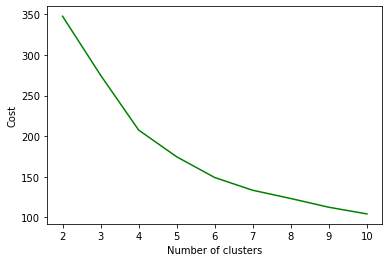

In [37]:
plt.plot(range(2 , 11), cost_list, c='green')
plt.xlabel("Number of clusters")
plt.ylabel("Cost")

In [38]:
best_sil_score = []
for k in range(9):
    if k==0:
        best_sil_score.append(silscore2[indexes[k]])
    if k==1:
        best_sil_score.append(silscore3[indexes[k]])
    if k==2:
        best_sil_score.append(silscore4[indexes[k]])
    if k==3:
        best_sil_score.append(silscore5[indexes[k]])
    if k==4:
        best_sil_score.append(silscore6[indexes[k]])
    if k==5:
        best_sil_score.append(silscore7[indexes[k]])
    if k==6:
        best_sil_score.append(silscore8[indexes[k]])
    if k==7:
        best_sil_score.append(silscore9[indexes[k]])
    if k==8:
        best_sil_score.append(silscore10[indexes[k]])

best_sil_score 

[0.30774081873430054,
 0.31063817535677896,
 0.3387491493626978,
 0.3421745862775616,
 0.35272492954240614,
 0.34075938070940603,
 0.320059460890438,
 0.3450978278426692,
 0.3400866599655411]

Text(0, 0.5, 'sil_scores')

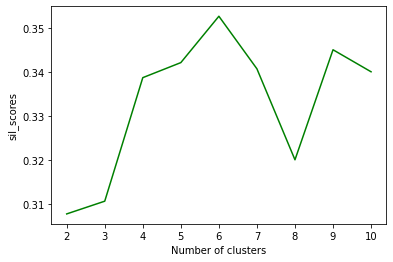

In [39]:
plt.plot(range(2 , 11),best_sil_score , c='green')
plt.xlabel("Number of clusters")
plt.ylabel("sil_scores")

Q8

In [49]:
kmeans6 = KMeans(n_clusters=6, random_state=indexes[2], n_init="auto", init='k-means++').fit(customers)
kmeans4 = KMeans(n_clusters=4, random_state=indexes[4], n_init="auto", init='k-means++').fit(customers)

output6 = kmeans6.predict(customers_test)
hazine6 = kmeans6.inertia_
print(hazine6)
print(output6)

output4 = kmeans4.predict(customers_test)
hazine4 = kmeans4.inertia_
print(hazine4)
print(output4)

customers_test_final = np.c_[customers_test, output4 ]

154.13190162497733
[0 2 0 3 0 2 2 5 4 3 3 2 1 2 2 4 5 3 5 2 0 0 0 0 2 0 2 4 1 5 5 3 2 0 5 3 5
 3 1 0]
207.49244783686552
[0 3 1 1 0 3 3 2 0 1 1 3 2 3 3 0 2 1 2 3 0 0 1 0 3 0 3 0 2 2 2 1 3 0 2 1 2
 2 2 0]


C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Q9

In [50]:
csv_file_path = "C:/Users/acer/Desktop/ML_pro/predicts.csv"
with open(csv_file_path, mode='w', newline='') as file:
    # Create a CSV writer object
    writer = csv.writer(file)

    # Write each record (row) to the CSV file
    for record in customers_test_final:
        writer.writerow(record)

Q10

In [42]:
pca = PCA(n_components = 2)
pca.fit(customers)
data_pca = pca.transform(customers)
data_pca = pd.DataFrame(data_pca,columns=['PCA1','PCA2'])
data_pca.head()

,PCA1,PCA2
0,-1.145726,0.452312
1,1.052578,2.474169
2,-1.723305,-1.521100
3,-1.130407,3.037659
4,1.442491,-0.674069


In [43]:
pca = PCA(n_components = 2)
pca.fit(customers_test)
data_pca_test = pca.transform(customers_test)
data_pca_test = pd.DataFrame(data_pca_test,columns=['PCA1','PCA2'])
data_pca_test.head()

,PCA1,PCA2
0,0.116483,1.403186
1,-2.218358,-0.737404
2,0.401779,-0.140936
3,-0.012564,-0.767738
4,0.387045,0.905418


Q11

In [44]:
kmeans6_pca = KMeans(n_clusters=6, random_state=indexes[4], n_init="auto", init='k-means++').fit(data_pca)
labels6_pca = kmeans6_pca.labels_
centers6_pca = kmeans6_pca.cluster_centers_

kmeans4_pca = KMeans(n_clusters=4, random_state=indexes[2], n_init="auto", init='k-means++').fit(data_pca)
labels4_pca = kmeans4_pca.labels_
centers4_pca = kmeans4_pca.cluster_centers_

output6_pca = kmeans6_pca.predict(data_pca_test)
hazine6_pca = kmeans6_pca.inertia_
print(labels6_pca)
print(centers6_pca)
print(hazine6_pca)
print(output6_pca)

output4_pca = kmeans4_pca.predict(data_pca_test)
hazine4_pca = kmeans4_pca.inertia_
print(hazine4_pca)
print(output4_pca)

[2 4 5 4 3 2 2 1 4 1 1 0 2 2 0 2 2 0 2 1 5 0 0 1 1 4 5 1 1 0 4 5 2 3 1 0 1
 0 5 2 1 3 5 3 5 3 0 2 1 0 4 1 2 3 2 2 5 2 2 0 5 5 2 2 5 0 2 3 0 3 5 0 2 2
 2 2 0 2 2 5 2 0 2 2 1 2 2 0 2 0 0 1 0 1 2 0 5 4 0 1 2 0 0 3 0 5 0 0 3 3 5
 0 0 3 2 5 0 0 1 3 1 0 0 1 1 2 2 2 1 0 0 0 1 3 2 5 1 5 5 2 2 4 3 2 0 2 1 1
 3 3 0 2 5 2 3 5 1 1 1 3]
[[ 0.27900819 -0.4769333 ]
 [ 1.2395826   0.57314153]
 [-1.02012966  0.62650376]
 [ 1.51834141 -0.98417202]
 [ 0.42635556  2.26895302]
 [-1.5419924  -1.15982547]]
64.62937003581793
[4 5 0 0 1 5 2 0 4 0 5 2 3 2 2 4 0 0 0 2 2 1 0 2 2 2 5 1 3 1 1 0 2 2 3 0 0
 0 0 4]
96.99745718829047
[1 3 2 2 1 3 0 2 1 2 3 0 2 0 0 0 2 2 2 0 0 1 0 0 0 0 3 1 2 1 1 2 0 0 2 3 2
 2 2 0]


C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [51]:
customers_test_final_pca = np.c_[customers_test_final, output4_pca ]

In [52]:
csv_file_path = "C:/Users/acer/Desktop/ML_pro/predicts.csv"
with open(csv_file_path, mode='w', newline='') as file:
    # Create a CSV writer object
    writer = csv.writer(file)

    # Write each record (row) to the CSV file
    for record in customers_test_final_pca:
        writer.writerow(record)

Q12

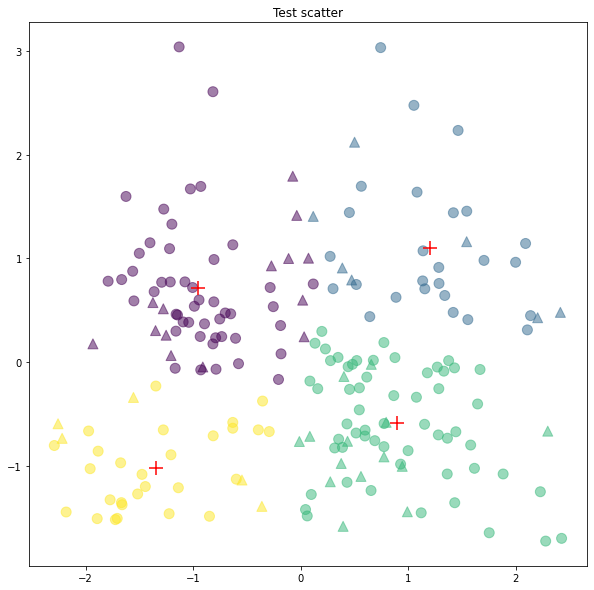

In [53]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, title="Test scatter")
ax.scatter(data_pca["PCA1"], data_pca["PCA2"], c=labels4_pca, s=100 , alpha=0.5)
ax.scatter(centers4_pca[:,0], centers4_pca[:,1], s=200, marker='+', color='red')
ax.scatter(data_pca_test["PCA1"], data_pca_test["PCA2"], c=output4_pca, s=100 , alpha=0.5 , marker='^')
fig.savefig("test_scatter.png")